# Plots the DFT interaction energy of the combined hBN-water system as a function of sheet-to-oxygen distance h.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def make_df_dft(data_path, ryd_per_ev=0.0734986176, mev_per_ev=1000):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    df["total_energy_ev"] = df["total_energy_ryd"].values / ryd_per_ev
    df["total_energy_mev"] = df["total_energy_ev"].values * mev_per_ev
    return df


def make_df_rpa_int_energies(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "method",
            "int_energy_mev",
        ],
    )
    systems = df["system"].values
    df["h"] = [float(system.split("_")[-1]) for system in systems]
    df["system_without_h"] = ["_".join(system.split("_")[:-2]) for system in systems]
    return df


def gather_ref_energies(df):
    hBN_ref_energy = df[df.system == "hBN"]["total_energy_mev"].values[0]
    water_Oup_Hdown_ref_energy = df[df.system == "water_Oup_Hdown"][
        "total_energy_mev"
    ].values[0]
    return hBN_ref_energy, water_Oup_Hdown_ref_energy


def df_dft_trunc(df):
    df = df.loc[(df.system != "hBN") & (df.system != "water_Oup_Hdown")]
    return df


def make_df_dft_int_energies(df_dft):
    df_dft_int_energies = pd.DataFrame({})
    hBN_ref_energy, water_Oup_Hdown_ref_energy = gather_ref_energies(df_dft)
    df_dft = df_dft_trunc(df_dft)
    df_dft_int_energies["system"] = df_dft["system"].values
    functionals = df_dft["functional"].values
    df_dft_int_energies["method"] = [f"dft-{functional}" for functional in functionals]
    df_dft_int_energies["int_energy_mev"] = (
        df_dft["total_energy_mev"].values - hBN_ref_energy - water_Oup_Hdown_ref_energy
    )
    systems = df_dft_int_energies["system"].values
    df_dft_int_energies["h"] = [float(system.split("_")[-1]) for system in systems]
    df_dft_int_energies["system_without_h"] = [
        "_".join(system.split("_")[:-2]) for system in systems
    ]
    return df_dft_int_energies


def add_color_code(row, color_code={"rpa":"k", "dft-pbe":"b", "dft-b3lyp":"r", "dft-pbe0":"k"}):
    for method in color_code:
        if method in row:
            return color_code[method]


def plot_int_energy(df):
    systems = df.system_without_h.unique()
    for system in systems:
        plt.figure(figsize=(7, 5))
        plt.ylim(-130, 50)
        plt.title(f"Interaction energy curve for {system}")
        plt.xlabel("Sheet-to-oxygen distance h (A)")
        plt.ylabel(r"$\Delta E_{int}$ (meV)")
        for method in df.method.unique():
            data = df[(df.system_without_h == system) & (df.method == method)].copy()
            if not data.empty:
                plt.plot(
                    "h",
                    "int_energy_mev",
                    "-o",
                    data=data,
                    color=data["color"].values[0],
                    label=method,
                )
        if system == "hBN_water_Oup_Hdown":
            plt.plot(data.h.unique(), [45, 0, -15, -18, -17, -12, -7, -2], "-o", color="r", label="dft-b3lyp (guess)")
            plt.plot(data.h.unique(), [40, -5, -20, -23, -22, -15, -8, -3], "-o", color="g", label="dft-pbe0 (guess)")
            plt.plot(data.h.unique(), [-40, -75, -89, -88, -85, -60, -37, -10], "-x", color="b", label="dft-pbe-d2 (guess)")
            plt.plot(data.h.unique(), [-43, -78, -92, -91, -90, -65, -42, -15], "-x", color="r", label="dft-b3lyp-d2 (guess)")
            plt.plot(data.h.unique(), [-48, -83, -97, -96, -95, -70, -47, -20], "-x", color="g", label="dft-pbe0-d2 (guess)")
        plt.axhline(y=0, linestyle="--", color="k")
        plt.legend()
        save_path = f"/Users/Nathan/Desktop/{system}_int_energy_plot.png"
        print(f"Saving png file to {save_path}")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

In [53]:
dft_data_path = "dft_total_energy_data.txt"
df_dft = make_df_dft(dft_data_path)
df_dft

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,total_energy_mev
0,hBN_water_Oup_Hdown_h_2.9907,pbe,paw,700,3,8,-10249.326925,-139449.247613,-1.394492e+08
1,hBN_water_Oup_Hdown_h_3.1944,pbe,paw,700,3,8,-10249.330086,-139449.290616,-1.394493e+08
2,hBN_water_Oup_Hdown_h_3.3889,pbe,paw,700,3,8,-10249.331316,-139449.307355,-1.394493e+08
3,hBN_water_Oup_Hdown_h_3.5926,pbe,paw,700,3,8,-10249.331682,-139449.312333,-1.394493e+08
4,hBN_water_Oup_Hdown_h_3.7963,pbe,paw,700,3,8,-10249.331621,-139449.311507,-1.394493e+08
5,hBN_water_Oup_Hdown_h_4.5000,pbe,paw,700,3,8,-10249.330712,-139449.299140,-1.394493e+08
6,hBN_water_Oup_Hdown_h_5.0093,pbe,paw,700,3,8,-10249.330195,-139449.292098,-1.394493e+08
7,hBN_water_Oup_Hdown_h_6.0093,pbe,paw,700,3,8,-10249.329735,-139449.285849,-1.394493e+08
8,hBN,pbe,paw,700,3,8,-10205.292212,-138850.124610,-1.388501e+08
9,water_Oup_Hdown,pbe,paw,700,3,1,-44.037234,-599.157314,-5.991573e+05


In [54]:
rpa_data_path = "rpa_interaction_energy_data.txt"
df_dft_int_energies = make_df_dft_int_energies(df_dft)
df_int_energies = pd.concat(
    [df_dft_int_energies, make_df_rpa_int_energies(rpa_data_path)]
)
df_int_energies["color"] = df_int_energies["method"].apply(add_color_code)
df_int_energies

,system,method,int_energy_mev,h,system_without_h,color
0,hBN_water_Oup_Hdown_h_2.9907,dft-pbe,34.311258,2.9907,hBN_water_Oup_Hdown,b
1,hBN_water_Oup_Hdown_h_3.1944,dft-pbe,-8.692408,3.1944,hBN_water_Oup_Hdown,b
2,hBN_water_Oup_Hdown_h_3.3889,dft-pbe,-25.430818,3.3889,hBN_water_Oup_Hdown,b
3,hBN_water_Oup_Hdown_h_3.5926,dft-pbe,-30.408599,3.5926,hBN_water_Oup_Hdown,b
4,hBN_water_Oup_Hdown_h_3.7963,dft-pbe,-29.583278,3.7963,hBN_water_Oup_Hdown,b
5,hBN_water_Oup_Hdown_h_4.5000,dft-pbe,-17.215562,4.5000,hBN_water_Oup_Hdown,b
6,hBN_water_Oup_Hdown_h_5.0093,dft-pbe,-10.173933,5.0093,hBN_water_Oup_Hdown,b
7,hBN_water_Oup_Hdown_h_6.0093,dft-pbe,-3.924564,6.0093,hBN_water_Oup_Hdown,b
0,hBN_water_Oup_Hdown_h_2.9907,rpa,-29.313725,2.9907,hBN_water_Oup_Hdown,k
1,hBN_water_Oup_Hdown_h_3.1944,rpa,-62.175018,3.1944,hBN_water_Oup_Hdown,k


In [55]:
data_path = "all_interaction_energy_data.txt"
df_int_energies.to_csv(data_path, header=None, index=None, sep=" ", mode="w")

Saving png file to /Users/Nathan/Desktop/hBN_water_Oup_Hdown_int_energy_plot.png
Saving png file to /Users/Nathan/Desktop/hBN_water_Oleft_Hright_int_energy_plot.png
Saving png file to /Users/Nathan/Desktop/hBN_water_Odown_Hup_rotated_int_energy_plot.png


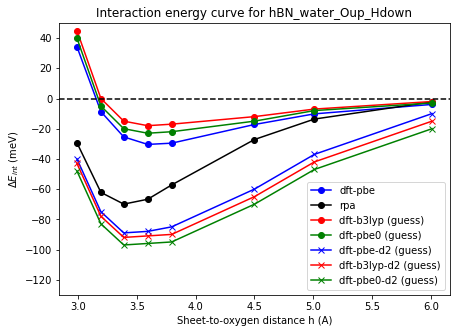

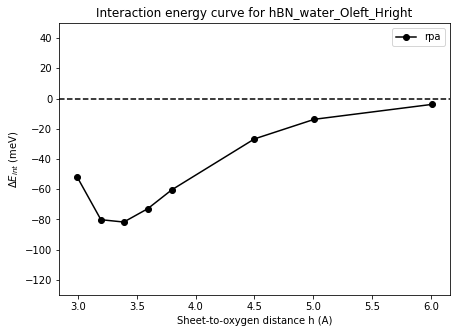

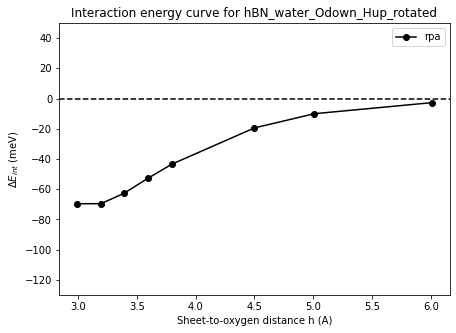

In [70]:
plot_int_energy(df_int_energies)